datasets
http://www.talkinghands.co.in/
https://www.printablee.com/post_sign-language-numbers-1-100-chart-printables_313728/

In [1]:
import speech_recognition as sr
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def input_voice():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        print("Speak now: ")
        audio = r.listen(source)
    text = r.recognize_google(audio)
    return text

In [3]:
def input_text(n):
    if n == '1':
        try:
            text = input_voice()
        except:
            print("No audio found! try again")
            main()
    elif n == '2':
        text = input()
    else:
        print("Enter only 1 or 2")
        main()
    return text

In [4]:
def load_img(name):
    image = cv2.imread('ISL\\{0}.jpg'.format(name))
    RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return RGB_img

In [5]:
def hconcat_resize(img_list, interpolation = cv2.INTER_CUBIC):
    
    h_min = min(img.shape[0] for img in img_list)
      
    im_list_resize = [cv2.resize(img, (int(img.shape[1] * h_min / img.shape[0]), h_min), interpolation = interpolation) for img in img_list]
      
    return cv2.hconcat(im_list_resize)

In [12]:
def text_to_sign(text):
    words = text.split()

    for word in words:
        l = len(word)
        img_list = []
        for letter in word:
            img_list.append(load_img(letter))
        sign = hconcat_resize(img_list)
        fig = plt.figure()
        fig.set_size_inches(5*l,1*l)
        plt.imshow(sign)
        plt.show()

In [13]:
def main():
    try:
        print("Enter 1 to speak")
        print("Enter 2 to type")
        n = input()
        text = input_text(n)
        print(text)
        text_to_sign(text)
    except:
        print()

Enter 1 to speak
Enter 2 to type
2
anchal
anchal


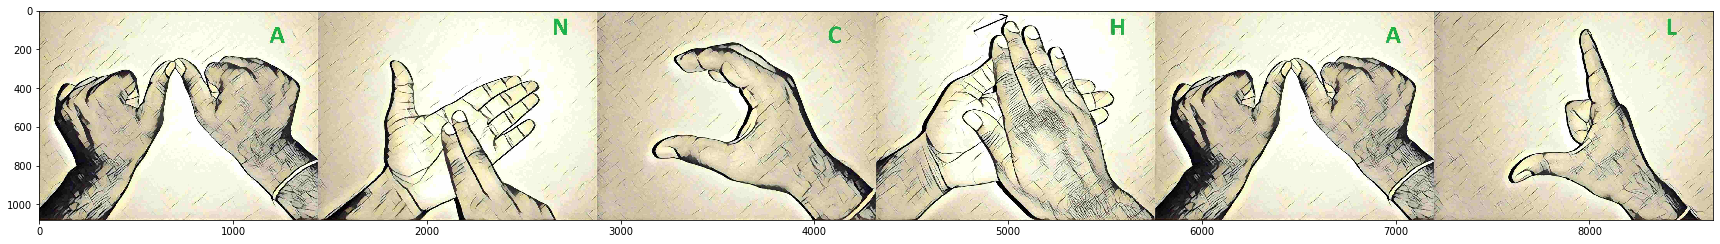

In [16]:
main()